### Calculations to accompany Section II.C of:
## A computational introduction to quantum statistics using harmonically trapped particles

####   Martin Ligare, Department of Physics & Astronomy, Bucknell University

                                              Abstract
   In a 1997 paper Moore and Schroeder argued that the development of student understanding
of thermal physics could be enhanced by computational exercises that highlight the link between
the statistical definition of entropy and the second law of thermodynamics [Am. J. Phys. 65, 26
(1997)]. I introduce examples of similar computational exercises for systems in which the quantum
statistics of identical particles plays an important role. I treat isolated systems of small numbers of
particles confined in a common harmonic potential, and use a computer to enumerate all possible
occupation-number configurations and multiplicities. The examples illustrate the effect of quantum
statistics on the sharing of energy between weakly interacting subsystems, as well as the distribution
of energy within subsystems. The examples also highlight the onset of Bose-Einstein condensation
in small systems.


In Section II.C I calculate the 

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from sympy.utilities.iterables import partitions
from scipy import special

In [2]:
# Following is an Ipython magic command that puts figures in notebook.
%matplotlib notebook
        
# M.L. modifications of matplotlib defaults
# Changes can also be put in matplotlibrc file, 
# or effected using mpl.rcParams[]
mpl.style.use('classic') 
plt.rc('figure', figsize = (6, 4.5)) # Reduces overall size of figures
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True) # Adjusts supblot parameters for new size

In [15]:
def convert(npa):
    '''Converts numpy array with information on occupation-number configuration for
    for bosons to correspoding occupation-number configuration for fermions.
    See Appendix A of manuscript.'''
    n = np.sum(npa[1])
    count = 0
    for i in range(len(npa[0])):
        for j in range(npa[1,i]):
            #print(i, j, count)
            base[n_particles - 1 - count], base[n_particles- 1 - count + npa[0,i]]\
                 = base[n_particles - 1 - count + npa[0,i]], base[n_particles - 1 - count]
            count += 1
    return(base)

In [4]:
def bose_einstein(q,t):
    '''Bose-Einstein distribution for n bosons in 1-D HO potential (with 
    energy spacing of 1) at temperature t in the thermodynamic limit. The 
    constant c depends on the number of particles; it was determined using 
    distributions_limit.ippynb '''
    c = 1.10109
    return 1/(c*np.exp(q/t)-1)

def fermi_dirac(q,t):
    '''Fermi-Dirac distribution for n fermions in 1-D HO potential (with 
    energy spacing of 1) at temperature t in the thermodynamic limit. The 
    constant c depends on the number of particles; it was determined using 
    distributions_limit.ippynb '''
    c = 0.03495
    return  1/(c*np.exp(q/t)+1)

def boltzmann(q,t):
    '''Boltzmann distribution for n distinguishablee particles in 1-D 
    HO potential (with energy spacing of 1) at temperature t in the 
    thermodynamic limit. The constant c depends on the number of 
    particles; it was determined using distributions_limit.ippynb '''
    return 1/(0.31372*np.exp(q/t))

### Distribution for bosons

Uses Eq. (11) of manuscript.

In [53]:
n_particles = 20
energy_total = 40
t = 5.76

sum = np.zeros(energy_total + 1)
count = 0
for p in partitions(energy_total, n_particles):
    npa = np.array(list(p.items())).T
    for i in range(len(npa[0])):
        sum[npa[0,i]] += npa[1,i]
    count += 1
    #print(count)

pop_B = sum/count   
pop_B[0] = n_particles - np.sum(pop_B)

<IPython.core.display.Javascript object>


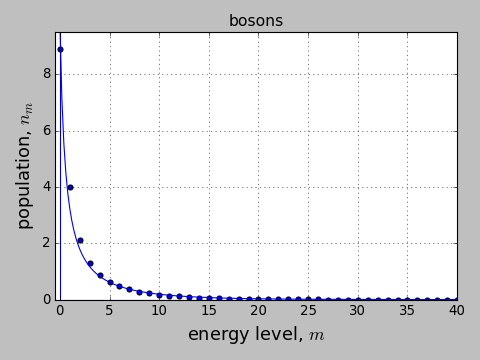

In [54]:
plt.figure()
x = np.linspace(0,len(num)-1,len(num))
xc = np.linspace(0,len(num)-1, 201)
plt.scatter(x,pop_B)
plt.plot(xc, bose_einstein(xc,t))
plt.xlim(-0.5,40)
plt.ylim(0,9.5)
plt.grid()
plt.xlabel('energy level, $m$')
plt.ylabel('population, $n_m$')
plt.title('bosons')
plt.axhline(0)
plt.axvline(0); 

### Distribution for fermions


In [43]:
n_particles = 20
eF = int(n_particles*(n_particles -1)/2)
energy_total = 40 + eF
energy_total, eF

(230, 190)

In [44]:
count = 0
sum = np.zeros(n_particles + energy_total-eF)
for p in partitions(energy_total - eF, n_particles):
    base = np.append(np.ones(n_particles), np.zeros(energy_total - eF))
    npa = np.array(list(p.items())).T
    sum += convert(npa)
    count += 1
    pop_F = sum/count

<IPython.core.display.Javascript object>


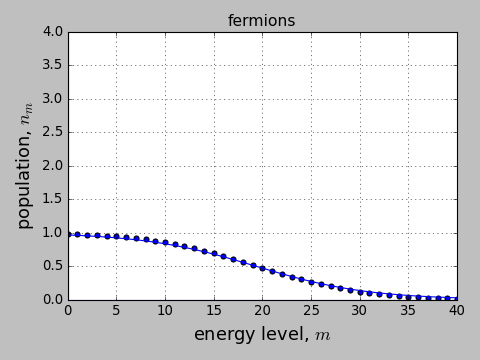

In [45]:
plt.figure()
x = np.linspace(0,len(pop_F)-1,len(pop_F))
xc = np.linspace(0,len(pop_F)-1, 201)
plt.scatter(x,pop_F) 
plt.plot(xc,fermi_dirac(xc,t))
plt.xlim(0,40)
plt.ylim(0,4)
plt.grid()
plt.xlabel('energy level, $m$')
plt.ylabel('population, $n_m$')
plt.title('fermions')
plt.axhline(0)
plt.axvline(0);

### Distribution for distinguishable  particles
<b>NOTE 1:</b>Uses Eq. (11) of manuscript, but algorithm for calculation of multiplicity not
discussed there.  

Illustration of algorithm -- Consider an occupation-number configuration of 9 particles with
{$n_0 = 2, n_1=4, n_2=0, n_3=3$}.  Consider the 3 particles with energy $3\epsilon$ first. There are 
$_3^9\mbox{C} = 84$ ways too chose the particles that have energy $3\epsilon$.  After choosing the 
first three particles, there are $9-3$ particles left, and the there are $_4^6\mbox{C} = 15$ ways 
to chose the particles that have energy $\epsilon$.  There is no remaining choice in the particles that
have energy 0.  So

$$ 
\Omega_D = _4^9\mbox{C}\times\, _2^{9-3}\mbox{C} = 84\times 15 = 1260.
$$


<b>NOTE 2:</b> To achieve a temperature for distinguishable particles that is the same as that of 
the boson and fermion illustrations above requires an energy of $99\epsilon$.  The calculation of the 
distribution in this case requires <i>much</i> more time than the calculation for for bosons and fermions.

<b>NOTE 3:</b> This calculation takes a long time.

In [59]:
%%time
energy_total = 99
sum = np.zeros(energy_total + 1)
count = 0
for p in partitions(energy_total, n_particles):
    npa = np.array(list(p.items())).T
    g = 1
    nn = n_particles
    for i in range(len(npa[0])):
        g *=  special.binom(nn, npa[1,i])
        nn -= npa[1,i]
    count += g
    
    for i in range(len(npa[0])):
        sum[npa[0,i]] += npa[1,i]*g
    #print(count)

pop_D = sum/count
pop_D[0] = n_particles - np.sum(pop_D)

CPU times: user 2h 36min 36s, sys: 4.18 s, total: 2h 36min 41s
Wall time: 2h 36min 41s


<IPython.core.display.Javascript object>


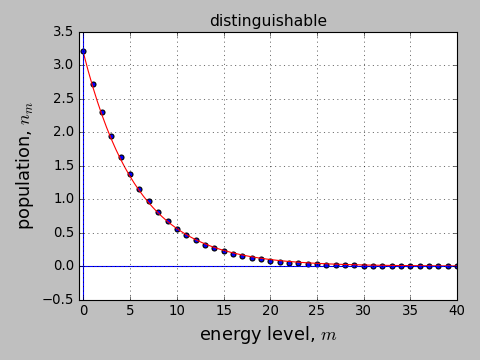

In [63]:
plt.figure()
x = np.linspace(0, energy_total, energy_total+1)
xc = np.linspace(0, energy_total, 201)
y = pop_D
y2 = boltzmann(xc,t)
plt.scatter(x,y)
plt.plot(xc,y2,color='red')
plt.xlim(-0.5,40)
plt.grid()
plt.xlabel('energy level, $m$')
plt.ylabel('population, $n_m$')
plt.title('distinguishable')
plt.axhline(0)
plt.axvline(0);

#### Combined graphs

<IPython.core.display.Javascript object>


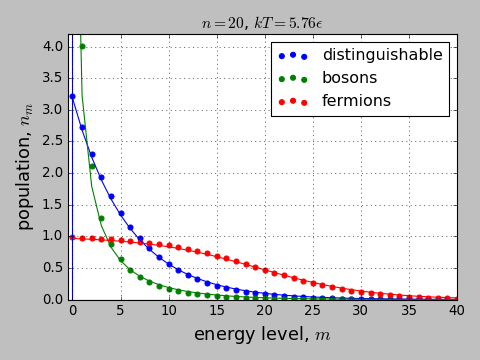

In [78]:
energy_total = 40
plt.figure()
x = np.linspace(0, energy_total, energy_total+1)
xc = np.linspace(0, energy_total, energy_total+1)
yD = pop_D[:41]
yB = pop_B
yF = pop_F[:41]
y2 = boltzmann(xc, t)
y3 = bose_einstein(xc, t)
y4 = fermi_dirac(xc, t)
plt.scatter(x,yD, label='distinguishable', color='blue')
plt.scatter(x,yB, label='bosons', color='green')
plt.scatter(x,yF, label='fermions', color='red')
plt.plot(xc,y2)
plt.plot(xc,y3)
plt.plot(xc,y4)
plt.xlim(-0.5,40)
plt.ylim(0,4.2)
plt.grid()
plt.xlabel('energy level, $m$')
plt.ylabel('population, $n_m$')
plt.title('$n = 20$, $kT = 5.76\epsilon$')
plt.axhline(0)
plt.axvline(0)
plt.legend();


#### Version information
`version_information` is from J.R. Johansson (`jrjohansson at gmail.com`); see <a href='http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb'>Introduction to scientific computing with Python</a> for more information and instructions for package installation.


In [61]:
%load_ext version_information

In [62]:
version_information numpy, scipy, sympy, matplotlib

Software versions
Python 3.7.7 64bit [GCC 7.3.0]
IPython 7.16.1
OS Linux 4.9.0 9 amd64 x86_64 with debian 9.13
numpy 1.18.5
scipy 1.5.0
sympy 1.6.1
matplotlib 3.2.2
Sun Dec 06 18:54:25 2020 EST